# TrainingPhase and General scheduler

Creates a scheduler that lets you train a model with following different [`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase).

In [1]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.general_sched import * 
from fastai import *
from fastai.vision import *

In [2]:
show_doc(TrainingPhase, doc_string=False)

<h2 id="TrainingPhase"><code>class</code> <code>TrainingPhase</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L8" class="source_link">[source]</a></h2>

> <code>TrainingPhase</code>(`length`:`int`, `lrs`:`Floats`, `moms`:`Floats`, `lr_anneal`:`AnnealFunc`=`None`, `mom_anneal`:`AnnealFunc`=`None`)

Create a phase for training a model during `length` iterations, following a schedule given by `lrs` and `lr_anneal`, `moms` and `mom_anneal`. More specifically, the phase will make the learning rate (or momentum) vary from the first value of `lrs` (or `moms`) to the second, following `lr_anneal` (or `mom_anneal`). If an annealing function is speficied but `lrs` or `moms` is a float, it will decay to 0. If no annealing function is specified, the default is a linear annealing if `lrs` (or `moms`) is a tuple, a constant parameter if it's a float. 

In [3]:
show_doc(GeneralScheduler)

<h2 id="GeneralScheduler"><code>class</code> <code>GeneralScheduler</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L21" class="source_link">[source]</a></h2>

> <code>GeneralScheduler</code>(`learn`:[`Learner`](/basic_train.html#Learner), `phases`:`Collection`\[[`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase)\]) :: [`Callback`](/callback.html#Callback)

Schedule multiple [`TrainingPhase`](/callbacks.general_sched.html#TrainingPhase) for a [`Learner`](/basic_train.html#Learner).  

In [4]:
show_doc(GeneralScheduler.on_batch_end, doc_string=False)

<h4 id="GeneralScheduler.on_batch_end"><code>on_batch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L34" class="source_link">[source]</a></h4>

> <code>on_batch_end</code>(`train`, `kwargs`:`Any`)

Takes a step in the current phase and prepare the hyperparameters for the next batch.

In [5]:
show_doc(GeneralScheduler.on_train_begin, doc_string=False)

<h4 id="GeneralScheduler.on_train_begin"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/general_sched.py#L26" class="source_link">[source]</a></h4>

> <code>on_train_begin</code>(`n_epochs`:`int`, `kwargs`:`Any`)

Initiates the hyperparameters to the start values of the first phase. 

Let's make an example by using this to code [SGD with warm restarts](https://arxiv.org/abs/1608.03983).

In [6]:
def fit_sgd_warm(learn, n_cycles, lr, mom, cycle_len, cycle_mult):
    n = len(learn.data.train_dl)
    phases = [TrainingPhase(n * (cycle_len * cycle_mult**i), lr, mom, lr_anneal=annealing_cos) for i in range(n_cycles)]
    sched = GeneralScheduler(learn, phases)
    learn.callbacks.append(sched)
    if cycle_mult != 1:
        total_epochs = int(cycle_len * (1 - (cycle_mult)**n_cycles)/(1-cycle_mult)) 
    else: total_epochs = n_cycles * cycle_len
    learn.fit(total_epochs)

In [11]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = Learner(data, simple_cnn((3,16,16,2)), metrics=[accuracy]).to_fp16()
fit_sgd_warm(learn, 3, 1e-3, 0.9, 1, 2)

Total time: 05:17
epoch  train_loss  valid_loss  accuracy
1      0.188445    0.176782    0.933268  (00:44)
2      0.159573    0.155093    0.945044  (00:44)
3      0.155964    0.150465    0.946516  (00:46)
4      0.134799    0.127748    0.955348  (00:45)
5      0.126042    0.113303    0.960255  (00:45)
6      0.105861    0.108705    0.964671  (00:44)
7      0.113409    0.107404    0.964671  (00:46)



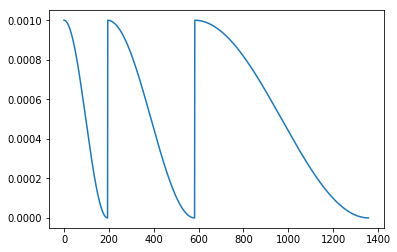

In [12]:
learn.recorder.plot_lr()

## Undocumented Methods - Methods moved below this line will intentionally be hidden